# Linear Discriminant Analysis (LDA)
- 이 노트북에서는 선형판별분석(LDA)을 사용하여 고객이 승용 잔디깎기를 소유할 가능성에 따라 고객을 분류하는 분류 모델을 구축합니다.


- 분류 모델의 훈련, 평가 및 예측을 위해 scikit-learn 패키지를 사용합니다. 선형판별분석(LDA) 함수에 대한 문서는 다음 링크를 참조하세요:
    - https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

## 1. LDA on "Riding Mowers" dataset

### (1) Prepare an example data
- 데이터셋은 고객의 소득(Income)과 부지 크기(Lot Size)와 같은 고객 정보를 포함하여 고객이 승용 잔디깎기를 소유하는지(Ownership) 예측합니다.

In [2]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pylab as plt


In [3]:
url = "https://raw.githubusercontent.com/reisanar/datasets/master/RidingMowers.csv"
mower_df = pd.read_csv(url)

In [4]:
mower_df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


### (2) Define and Train a Linear Discriminant Analysis model
- 이 단계에서는 소득(Income)과 부지 크기(Lot Size)를 입력 특성으로, 소유권(Ownership)을 목표 변수로 사용하여 LDA 모델을 훈련시킵니다.

In [5]:
clf = LinearDiscriminantAnalysis()
clf.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print('Coefficients', clf.coef_)
print('Intercept', clf.intercept_)

c_income = clf.coef_[0, 0]
c_lotSize = clf.coef_[0, 1]
intercept = clf.intercept_[0]

print('Decision function')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income, c_lotSize, intercept))

print('\nExample Income=$60K Lot_Size=18.4Kft2')
print('  {:.2f}*60 + {:.2f}*18.4 + {:.2f} = {:.2f}'.format(c_income, c_lotSize, intercept,
                                                          clf.decision_function([[60, 18.4]])[0]))
print('  negative => nonowner')

Coefficients [[0.1002303  0.78518471]]
Intercept [-21.73876167]
Decision function
 = 0.10*Income + 0.79*Lot_Size + -21.74

Example Income=$60K Lot_Size=18.4Kft2
  0.10*60 + 0.79*18.4 + -21.74 = -1.28
  negative => nonowner


/Users/woojin/anaconda3/envs/DM/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


### (3) Visualize the decision boundary
- 이 단계에서는 소유자와 비소유자를 산점도에 시각화하고, LDA 결정 경계를 추가합니다.

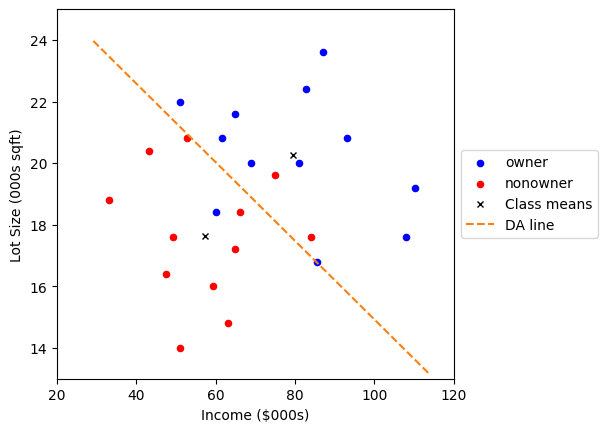

In [6]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(clf.means_[:,0], clf.means_[:,1], 'x', color='black', label='Class means', markersize=5)
x_lda = np.array(ax.get_xlim())
y_lda = (- intercept - c_income * x_lda) / c_lotSize
ax.plot(x_lda, y_lda, '--', color='C1', label='DA line')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### (5) Test and Evaluate the model

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

result_df = mower_df.copy()
result_df.index = result_df.index + 1
result_df['Dec. Function'] = clf.decision_function(mower_df.drop(columns=['Ownership']))
result_df['Prediction'] = clf.predict(mower_df.drop(columns=['Ownership']))
result_df['p(Owner)'] = clf.predict_proba(mower_df.drop(columns=['Ownership']))[:, 1]

print(result_df)

- 여기서 데이터셋의 각 고객에 대한 결정 함수와 예측을 계산하고, 소유자일 확률도 계산합니다.

- 요약:
    - Riding Mowers 데이터셋에서 선형판별분석(LDA) 모델을 구축하고 훈련시켰습니다.
    - 결정 함수를 계산하고, 결정 경계를 시각화하며, 데이터셋에서 모델의 성능을 평가했습니다.